In [1]:
!ls ../experiments/logs

arch_evals   lr_sweep	     misc		new_lr_sweep_llama
arch_sweep   lr_sweep_gpt2   new_lr_sweep	new_lr_sweep_nodrop
hyena_start  lr_sweep_llama  new_lr_sweep_gpt2


In [7]:
import glob
import os
import pandas as pd
import plotnine as p9
from tqdm import tqdm

In [9]:
dfs = []
for file in tqdm(list(glob.glob("../experiments/logs/arch_sweep/**/SummaryEvaluator.csv"))):
    # print(file)
    evaluator = file.split("/")[-1].split(".")[0]
    splitted = os.path.dirname(file).split("/")[-1].split(".")[0].split("_")
    dim = splitted[-2]
    lr = splitted[-1]
    arch = "_".join(splitted[:-2])
    log = pd.read_csv(file)
    # print(len(log))
    log["identifier"] = file
    log["arch"] = arch
    log["dim"] = int(dim)
    log["lr"] = lr
    log["evaluator"] = evaluator
    log["step_rel"] = log["step"] / log["step"].max()
    log["layers"] = 2
    log = log.groupby(["variable", "step", "evaluator", "step_rel", "identifier", "arch", "dim", "lr", "layers"]).mean().reset_index()
    dfs.append(log)
print(len(dfs))
df = pd.concat(dfs)
df = df.groupby(["variable", "step", "evaluator", "step_rel", "identifier", "arch", "dim", "lr", "layers"]).mean().reset_index()
df

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 119/119 [00:41<00:00,  2.84it/s]


119


,variable,step,evaluator,step_rel,identifier,arch,dim,lr,layers,value
0,PARENT.query_item.kl_div,0,SummaryEvaluator,0.0,../experiments/logs/arch_sweep/attention_128_1...,attention,128,1e-03,2,3.299206
1,PARENT.query_item.kl_div,0,SummaryEvaluator,0.0,../experiments/logs/arch_sweep/attention_128_1...,attention,128,1e-04,2,3.299206
2,PARENT.query_item.kl_div,0,SummaryEvaluator,0.0,../experiments/logs/arch_sweep/attention_128_1...,attention,128,1e-05,2,3.299206
3,PARENT.query_item.kl_div,0,SummaryEvaluator,0.0,../experiments/logs/arch_sweep/attention_128_5...,attention,128,5e-03,2,3.299206
4,PARENT.query_item.kl_div,0,SummaryEvaluator,0.0,../experiments/logs/arch_sweep/attention_128_5...,attention,128,5e-04,2,3.299206
...,...,...,...,...,...,...,...,...,...,...
150630,query_item.pred_prob,239600,SummaryEvaluator,1.0,../experiments/logs/arch_sweep/base_conv_64_1e...,base_conv,64,1e-04,2,0.924379
150631,query_item.pred_prob,239600,SummaryEvaluator,1.0,../experiments/logs/arch_sweep/base_conv_64_1e...,base_conv,64,1e-05,2,0.772847
150632,query_item.pred_prob,239600,SummaryEvaluator,1.0,../experiments/logs/arch_sweep/base_conv_64_5e...,base_conv,64,5e-03,2,0.901138
150633,query_item.pred_prob,239600,SummaryEvaluator,1.0,../experiments/logs/arch_sweep/base_conv_64_5e...,base_conv,64,5e-04,2,0.930426


/juice2/scr2/aryaman/tinylang/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


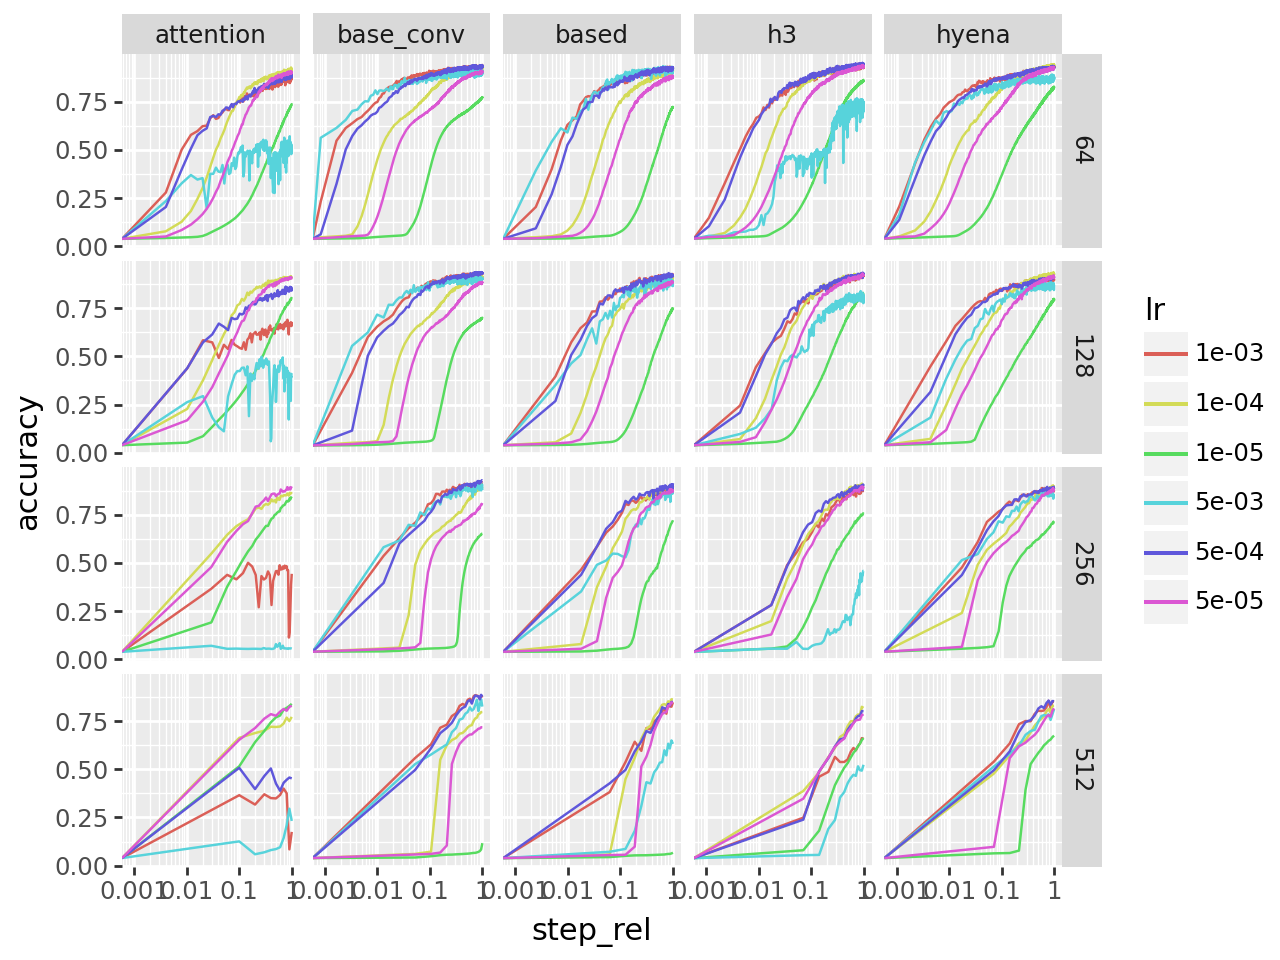

In [12]:
subset_df = df[df["variable"] == "query_item.pred_prob"]
plot = (
    p9.ggplot(subset_df, p9.aes(x="step_rel", y="value", color="lr", group="identifier")) +
    p9.geom_line() +
    p9.facet_grid("dim ~ arch") +
    p9.scale_x_log10() +
    # p9.scale_color_gradient(low="blue", high="red") +
    p9.labs(y="accuracy")
)
plot.show()